# Trabalho 2

Nomes e Matriculas dos integrantes

1. Luísa de Souza Ferreira - 102026

2. Lademir Junior - 102018

3. Jonas Magalhães - 102010

4. Felipe Ferreira - 102017

5. Bruno Alencar - 102008



## Parte I

$ v[i] = ( (2*v[i] + v[i]) *v[i] )$

1. Escreva o codigo do loop em assembler
2. Faça a simulação em Python
3. Faça a tabela de execução e calcule o CPI
4. Faça o grafo de dependência com graphviz
5. Escreva o código do software pipeline em python e faça a validação.
6. Faça a tabela de execução e calcule o CPI.

1. Escreva o codigo do loop em assembler
####LOOP: Ld f3,0(r1)
####addf f4,f3,f3 (2 * v[i])
####addf f4,f4,f3 (2 * v[i] + v[i])
####mult f5,f4,f3 ((2 * v[i] + v[i]) * v[i])
####sd f5,0(r1)
####Addi r1,r1,4
####Beq r1,r2,LOOP

2. Faça a simulação em Python

In [ ]:
# Aqui temos o codigo emulado em Python
#LOOP:
#Ld f3,0(r1)
#addf f4,f3,f3 (2 * v[i])
#addf f4,f4,f3 (2 * v[i] + v[i])
#mult f5,f4,f3 ((2 * v[i] + v[i]) * v[i])
#sd f5,0(r1)
#Addi r1,r1,4
#Beq r1,r2,LOOP
l = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
f2 = 1
l2 = []
for i in range(20):
   f3 = l[i]  # ld
   f4 = f3+f3 # addf
   f4 = f4 + f3 #addf
   f5 = f4*f3 # mul
   l[i] = f5  # sd
   l2.append((2*f3+f3)*f3)

print(l)
print(l2)

[0, 3, 12, 27, 48, 75, 108, 147, 192, 243, 300, 363, 432, 507, 588, 675, 768, 867, 972, 1083, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0, 3, 12, 27, 48, 75, 108, 147, 192, 243, 300, 363, 432, 507, 588, 675, 768, 867, 972, 1083]


3. Faça a tabela de execução e calcule o CPI

Podemos montar a tabela de execução considerando 2 ciclos para LD e SD, 3 ciclos para ADD de float e 5 ciclos para MUL de float.

Se calcularmos o CPI como o tempo do W da segunda iteração - tempo do W da primeira, por exemplo para instrução LOAD teremos

Calculo da CPI = $(22 -5) / 7= 2,4$

Codigo | F | D | E | W | F | D | E | W
---|---|---|---|---|---|---|---|---
Ld f3,0(r1) | 1| 2 | 34| 5 | 18 | 19 | 2021 | 22
addf f4,f3,f3 | 2 | 34 | 567 | 8 | 19 | 2021 | 21-23 | 24
addf f4,f4,f3 | 34 | 567 | 8910| 11
multf f4,f4,f3 | 567 | 8910 | 11-15 | 16
sd f4,0(r1) | 8910 | 11-15 | 1617 | -
Addi r1,r1,4 | 11-15 | 16 | 17 | 18
Beq r1,r1,LOOP | 16 | 17 |  |

4. Faça o grafo de dependência com graphviz


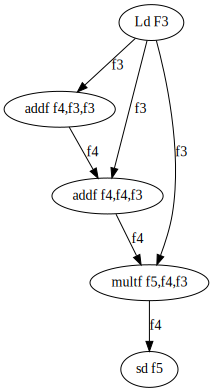

In [ ]:
from graphviz import Digraph
fsm = Digraph()
fsm.node('1','Ld F3')
fsm.node('2','addf f4,f3,f3')
fsm.node('3','addf f4,f4,f3')
fsm.node('4','multf f5,f4,f3')
fsm.node('5','sd f5')
fsm.edge('1','2','f3')
fsm.edge('1','3','f3')
fsm.edge('1','4','f3')
fsm.edge('2','3','f4')
fsm.edge('3','4','f4')
fsm.edge('4','5','f4')

fsm

5. Escreva o código do software pipeline em python e faça a validação.


In [ ]:
# Aqui temos o codigo emulado em Python
#LOOP:
#sd f5, 0 (r1)
#mult f1,f3,f2
#addf
#Ld f3,0(r1)
#addf f4,f3,f3 (2 * v[i])
#addf f4,f4,f3 (2 * v[i] + v[i])
#mult f5,f4,f3 ((2 * v[i] + v[i]) * v[i])
#sd f5,0(r1)
#Addi r1,r1,4
#Beq r1,r2,LOOP
l = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
f1 = l[0]
f2 = f1 + f1
f2 = f2 + f1
f2 = f2 * f1
#executamos as 4 primeiras instruções da primeira iteração, precisa dar sd no f3 e f1,f2 estao livres f3 ocupado
f1 = l[1]
f3 = f1 + f1
f3 = f3 + f1
f4 = f1
#executamos as 3 primeiras instruções da segunda iteração, precisa dar mul e multiplicar f1,f2 estao ocupados
f1 = l[2]
f5 = f1 + f1
#executamos as 2 primeiras instruções da terceira iteração, precisa dar mul e multiplicar f4,f5 estao ocupados
f6 = l[3]

for i in range(20):
   l[i] = f2
   f2 = f3 * f4
   f4 = f1
   f3 = f5 + f1
   f5 = f6 + f6
   f1 = f6
   f6 = l[i+4]


print(l)
print(l2)

[0, 3, 12, 27, 48, 75, 108, 147, 192, 243, 300, 363, 432, 507, 588, 675, 768, 867, 972, 1083, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0, 3, 12, 27, 48, 75, 108, 147, 192, 243, 300, 363, 432, 507, 588, 675, 768, 867, 972, 1083]


6. Faça a tabela de execução e calcule o CPI.

Calculo da CPI = $(22-9)/9=13/9=1.4$

Codigo | F | D | E | W | F | D | E | W
---|---|---|---|---|---|---|---|---
sd f2,0(r1) | 1| 2 | 34| - | 14 | 15 | 16-17 | -
multf f2,f3,f4 | 2 | 3 | 4-8 | 9 | 15 | 16 | 17-21 | 22
MV f4,f1 | 3| 4| 5| 6| |  |
addf f3,f5,f1 | 4 | 5-6 | 7-9 | 10
addf f5,f6,f6 | 5-6 | 7-9 | 10-12 | 13
MV f1,f6 |7-9 | 10-11 | 12-13 | 14| |  |
ld f6,4(r1) | 10-11 | 12 | 13-14 | 15
Addi r1,r1,4 | 12 | 13 | 14 | 15
Beq r1,r1,LOOP | 13 | 14 |  |

## Parte II



```
For i=0; i < N; i+=2
  v[i] = v[i]+3
  v[i+1] = v[i+1]*2 + v[i+1]
```

1. Escreva o codigo do loop em assembler
2. Faça a simulação em Python
3. Faça a tabela de execução e calcule o CPI
4. Faça o grafo de dependência com graphviz
5. Escreva o código do software pipeline em python e faça a validação.
6. Faça a tabela de execução e calcule o CPI.



1. Escreva o codigo do loop em assembler
####LOOP: ld f3, 0(r1)
####addf f3,f3,3 (v[i] + 3)
####sd f3, 0(r1)
####ld f4, 4(r1)
####addf f5, f4, f4 (v[i] * 2)
####addf f5, f5, f4 (v[i] * 2) + v[i]
####sd f5, 4(ri)
####addi r1, r1, 8
####Bne r1,r2,LOOP


2. Faça a simulação em Python

In [ ]:
# Aqui temos o codigo emulado em Python
#LOOP: ld f3, 0(r1)
#addf f3,f3,2 (v[i] + 2)
#sd f3, 0(r1)
#ld f3, 4(r1)
#addf f4, f3, f3 (v[i] * 2)
#addf f4, f4, f3 (v[i] * 2) + v[i]
#sd f4, 4(ri)
#addi r1, r1, 8
#Beq r1,r2,LOOP
l = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
l2 = []

for i in range(0,30,2):
    first  = l[i]
    second = l[i+1]
    f3 = l[i]  # ld
    f3 = f3+3 # addf
    l[i] = f3 #addf
    f3 = l[i+1] # ld
    f4 = f3 + f3 # addf vi * 2
    f4 = f4 + f3 #adff
    l[i+1] = f4
    l2.append(first+3)
    l2.append((second * 2 )+ second)

print(l)
print(l2)

[3, 3, 5, 9, 7, 15, 9, 21, 11, 27, 13, 33, 15, 39, 17, 45, 19, 51, 21, 57, 23, 63, 25, 69, 27, 75, 29, 81, 31, 87, 30]
[3, 3, 5, 9, 7, 15, 9, 21, 11, 27, 13, 33, 15, 39, 17, 45, 19, 51, 21, 57, 23, 63, 25, 69, 27, 75, 29, 81, 31, 87]


3. Faça a tabela de execução e calcule o CPI

Calculo da CPI  = (25-5) / 9 = 2.22

Codigo | F | D | E | W | F | D | E | W
---|---|---|---|---|---|---|---|---
ld f3, 0(r1) |1 |2 |3-4 |5 | 21| 22 |23-24|25
addf f3, f3, 2|2| 3-4|5-7 |8 | |  |
sd f3, 0(r1) |34 |57 | 89|- | |  |
ld f4, 4(r1) | 57|8 |910 |11 | |  |
addf f5,f4,f4 | 8|910 |11-13| 14| |  |
addf f5,f5,f4 | 9-10|11-13 |14-16 |17 | |  |
sd f5,4(r1) | 11-13|14-16 |17-18 |19 | |  |
addi r1,r1,8 | 14-16|17 |1819 |20| |  |
bne r1,r2,LOOP | 17 |1819 |20 | | |  |

4. Faça o grafo de dependência com graphviz

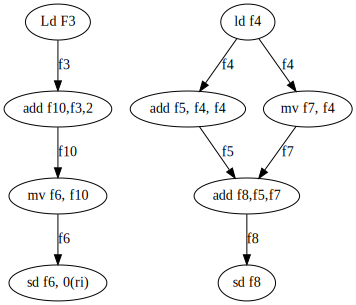

In [ ]:
from graphviz import Digraph
fsm = Digraph()
fsm.node('1','Ld F3')
fsm.node('2','add f10,f3,2')
fsm.node('8','mv f6, f10')
fsm.node('3','sd f6, 0(ri)')
fsm.node('4','ld f4')
fsm.node('5','add f5, f4, f4')
fsm.node('9','mv f7, f4')
fsm.node('6','add f8,f5,f7')
fsm.node('7','sd f8')



fsm.edge('1','2','f3')
fsm.edge('5','6','f5')
fsm.edge('4','5','f4')
fsm.edge('6','7','f8')
fsm.edge('2','8','f10')
fsm.edge('8','3','f6')
fsm.edge('4','9','f4')
fsm.edge('9','6','f7')


fsm

5. Escreva o código do software pipeline em python e faça a validação.

In [ ]:
# Aqui temos o codigo emulado em Python
#LOOP: ld f3, 0(r1)
#addf f3,f3,2 (v[i] + 2)
#sd f3, 0(r1)
#ld f3, 4(r1)
#addf f4, f3, f3 (v[i] * 2)
#addf f4, f4, f3 (v[i] * 2) + v[i]
#sd f4, 4(ri)
#addi r1, r1, 8
#Beq r1,r2,LOOP
l = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

#Sao 4 estagios, precisamos fazer os 3 primeiros da primeira iteracao
f3=l[0]
f4=l[1]

f10 = f3+3
f7 = f4
f5 = f4+f4

f6 = f10
f8 = f5+f7

#Os 2 primeiros da segunda iteração
f3=l[2]
f4= l[3]

f10 = f3+3
f7 = f4
f5 = f4+f4

# o 1 da terceira iteração
f3 = l[4]
f4 = l[5]

for i in range(0,23,2):
    # estagio 4
    l[i] = f6
    l[i+1] = f8

    #estagio 3
    f6 = f10
    f8 = f5+f7

    #estagio 2
    f10=f3+3
    f7 = f4
    f5 = f4+f4

    #estagio 1
    f3 = l[i+6]
    f4 = l[i+7]

print(l[:23])
print(l2[:23])

[3, 3, 5, 9, 7, 15, 9, 21, 11, 27, 13, 33, 15, 39, 17, 45, 19, 51, 21, 57, 23, 63, 25]
[3, 3, 5, 9, 7, 15, 9, 21, 11, 27, 13, 33, 15, 39, 17, 45, 19, 51, 21, 57, 23, 63, 25]


6. Faça a tabela de execução e calcule o CPI.

Calculo da CPI  = (17-5) / 11 = 1,09

Codigo | F | D | E | W | F | D | E | W
---|---|---|---|---|---|---|---|---
sd f6,0(r1) |1|2|34|-|13|14|1516|17
mv f6,f10 |2|3|45|6|||
sd f8,4(r1) |3|4|56|7|||
add f8,f5,f7 |4|5|678|9|||
addi f10,f3,2 |5|6|7|8|||
mv f7,f4 |6|78|9|10|||
ld f3,0(r1) |7|8|910|11|||
add f5,f4,f4 |8|9|10-12|13|||
add r1,r1,4 |9|10|11|12
ld f4,4(r1) |10|11|1213|14|||
bne r1,r2,loop | 11|12

## Parte III



```
For i=0; i < N; i+=2
  v[i] = (v[i]+2)*v[i+1]
  v[i+1] = v[i+1]*2 + v[i]
```

1. Escreva o codigo do loop em assembler
2. Faça a simulação em Python
3. Faça a tabela de execução e calcule o CPI
4. Faça o grafo de dependência com graphviz
5. Escreva o código do software pipeline em python e faça a validação.
6. Faça a tabela de execução e calcule o CPI.



1. Escreva o codigo do loop em assembler



In [ ]:
loop: addi, r2, r2, 4 # i+=2
ld f1, 0(r1) # v[i]
ld f2, 4(r1) # v[i+1]

addf f3,f1,2 # (v[i]+2)
multf f4,f3,f2 # (v[i]+2) * v[i+1]
sd f4, 0(r1) # v[i] = (v[i]+2) * v[i+1]

multf f5, f2, 2 # v[i+1]*2
addf f6, f5, f1 # v[i+1]*2 + v[i]
sd f6, 4(r2) # v[i+1] = v[i+1]*2 + v[i]

addi r1, r1, 8
beq r1, r2, loop

2. Faça a simulação em Python

In [ ]:
# loop: addi, r2, r2, 4 # i+=2
# ld f1, 0(r1) # v[i]
# ld f2, 4(r1) # v[i+1]

# addf f1,f1,2 # (v[i]+2)
# multf f1,f1,f2 # (v[i]+2) * v[i+1]
# sd f1, 0(r1) # v[i] = (v[i]+2) * v[i+1]

# multf f2, f2, 2 # v[i+1]*2
# addf f2, f2, f1 # v[i+1]*2 + v[i]
# sd f2, 4(r2) # v[i+1] = v[i+1]*2 + v[i]

# addi r1, r1, 4
# beq r1, r2, loop
import random

l = [i for i in range(50)]
l2 = [i for i in range(50)]

for i in range(0, len(l), 2):
  f1 = l[i]
  f2 = l[i+1]
  f1 = f1+2
  f1 = f1*f2
  l[i] = f1
  f2 = f2*2
  f2 = f2+f1
  l[i+1] = f2

for i in range(0, len(l2), 2):
  l2[i] = (l2[i]+2)*l2[i+1]
  l2[i+1] = l2[i+1]*2 + l2[i]


for i in range(len(l2)):
  if l[i] != l2[i]:
    print("Algum erro no software pipeline")

print(l)
print(l2)

[2, 4, 12, 18, 30, 40, 56, 70, 90, 108, 132, 154, 182, 208, 240, 270, 306, 340, 380, 418, 462, 504, 552, 598, 650, 700, 756, 810, 870, 928, 992, 1054, 1122, 1188, 1260, 1330, 1406, 1480, 1560, 1638, 1722, 1804, 1892, 1978, 2070, 2160, 2256, 2350, 2450, 2548]
[2, 4, 12, 18, 30, 40, 56, 70, 90, 108, 132, 154, 182, 208, 240, 270, 306, 340, 380, 418, 462, 504, 552, 598, 650, 700, 756, 810, 870, 928, 992, 1054, 1122, 1188, 1260, 1330, 1406, 1480, 1560, 1638, 1722, 1804, 1892, 1978, 2070, 2160, 2256, 2350, 2450, 2548]


3. Faça a tabela de execução e calcule o CPI

Calculo da CPI = $(21-5)/11=16/10=1,6$

Codigo | F | D | E | W | F | D | E | W
---|---|---|---|---|---|---|---|---
ld f1,0(r1)|1|2|3-4|5|17|18|19-20|21
ld f2,4(r1)|2|3|4-5|6|18|19|20-21|22
addf f3,f1,2|3|4|5-7|8
multf f4,f1,f2|4|5-7|8-12|13
sd f4, 0(r1)|5|6|7-8|-
multf f5, f2, 2|6|7|8-12.13|14
addf f6, f5, f1|7|8-13|14-16|17
sd f6, 4(r2) |8-13|14|15-16| -
addi r1, r1, 4|14|15|16|17
beq r1, r2, loop|15|16|-|-

4. Faça o grafo de dependência com graphviz

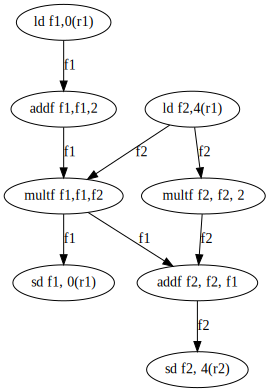

In [ ]:
from graphviz import Digraph
fsm = Digraph()
# ld f1, 0(r1) # v[i]
# ld f2, 4(r1) # v[i+1]

# addf f1,f1,2 # (v[i]+2)
# multf f1,f1,f2 # (v[i]+2) * v[i+1]
# sd f1, 0(r1) # v[i] = (v[i]+2) * v[i+1]

# multf f2, f2, 2 # v[i+1]*2
# addf f2, f2, f1 # v[i+1]*2 + v[i]
# sd f2, 4(r2) # v[i+1] = v[i+1]*2 + v[i]

# addi r1, r1, 4
# beq r1, r2, loop





fsm.node('1','ld f1,0(r1)')
fsm.node('2','ld f2,4(r1)')
fsm.node('3','addf f1,f1,2')
fsm.node('4','multf f1,f1,f2')
fsm.node('5','sd f1, 0(r1)')
fsm.node('6','multf f2, f2, 2')
fsm.node('7','addf f2, f2, f1')
fsm.node('8','sd f2, 4(r2)')
# fsm.node('9','addi r1, r1, 4')
# fsm.node('10','beq r1, r2, loop')

fsm.edge('1','3','f1')
fsm.edge('3','4','f1')
fsm.edge('2','6','f2')
fsm.edge('2','4','f2')
fsm.edge('4','5','f1')
fsm.edge('4','7','f1')
fsm.edge('7','8','f2')
# fsm.edge('9','10','r1')
fsm.edge('6','7','f2')

fsm

# For i=0; i < N; i+=2
#   v[i] = (v[i]+2)*v[i+1]
#   v[i+1] = v[i+1]*2 + v[i]

5. Escreva o código do software pipeline em python e faça a validação.

In [ ]:
# loop: addi, r2, r2, 4 # i+=2
# ld f1, 0(r1) # v[i]
# ld f2, 4(r1) # v[i+1]

# addf f1,f1,2 # (v[i]+2)
# multf f1,f1,f2 # (v[i]+2) * v[i+1]
# sd f1, 0(r1) # v[i] = (v[i]+2) * v[i+1]

# multf f2, f2, 2 # v[i+1]*2
# addf f2, f2, f1 # v[i+1]*2 + v[i]
# sd f2, 4(r2) # v[i+1] = v[i+1]*2 + v[i]

# addi r1, r1, 4
# beq r1, r2, loop



#LOOP
# sd f1
# sd f2
# multf f1,f3,f8
# addf f2, f1, f4
# addf f3,f5,2
# mv f8,f6
# multf f4, f6, 2
# ld f5
# ld f6


l = [i for i in range(50)]
l2 = [i for i in range(50)]

# f1 =l[0]
# f2=l[1]
# f9=f2
# f3=f1+2
# f4=f2*2
# f5=f3*f9
# f6=f5+f4

# f1=l[2]
# f2=l[3]
# f9=f2
# f3=f1+2
# f4=f2*2

# f1=l[4]
# f2=l[5]

f5=l[0]
f6=l[1]
f8=f6
f3=f5+2
f4=f6*2
f1=f3*f8
f2=f4*f1

f5=l[2]
f6=l[3]
f3=f5*2
f8=f6
f4=f6*2

f5=l[4]
f6=l[5]


for i in range(0, len(l) - 10, 2):
  l[i]=f1
  f1=f3*f8
  l[i+1]=f2
  f3=f5+2
  f8=f6

  f2=f1+f4
  f4=f6*2


  f5=l[i+6]
  f6=l[i+7]

for i in range(0, len(l2) -10, 2):
  l2[i] = (l2[i]+2)*l2[i+1]
  l2[i+1] = l2[i+1]*2 + l2[i]

print(l)
print(l2)

[2, 4, 12, 18, 30, 40, 56, 70, 90, 108, 132, 154, 182, 208, 240, 270, 306, 340, 380, 418, 462, 504, 552, 598, 650, 700, 756, 810, 870, 928, 992, 1054, 1122, 1188, 1260, 1330, 1406, 1480, 1560, 1638, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[2, 4, 12, 18, 30, 40, 56, 70, 90, 108, 132, 154, 182, 208, 240, 270, 306, 340, 380, 418, 462, 504, 552, 598, 650, 700, 756, 810, 870, 928, 992, 1054, 1122, 1188, 1260, 1330, 1406, 1480, 1560, 1638, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


6. Faça a tabela de execução e calcule o CPI.

Calculo da CPI = $(18-5)/11=13/11=1.18$

Codigo | F | D | E | W | F | D | E | W
---|---|---|---|---|---|---|---|---
sd f1,0(r1)|1|2|3-4|5|14|15|16-17|18
multf f1,f3,f8|2|3|4-8|9
sd f2,4(r1)|3|4|5-6|7
addf f3,f5,2|4|5|6-8...9|10
mv f8,f6|5|6|7|8
addf f2,f1f4|6|7|8-10...11|12
multf f4,f6,2|7|8|9-13|14
addi r1,r1,4|8|9|10|11
ld f5,20(r1)|9|10|11-12|13
ld f6,24(r1)|10|11-12|13-14|15
bn1 r1,r2,loop|11-12|13|-|-



